In [ ]:
import pandas as pd

train_df = pd.read_csv('twitter_training.csv', header=None, names=['tweet_id', 'entity', 'sentiment', 'tweet_content'])
valid_df = pd.read_csv('twitter_validation.csv', header=None, names=['tweet_id', 'entity', 'sentiment', 'tweet_content'])

combined_df = pd.concat([train_df, valid_df], ignore_index=True)
print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {valid_df.shape}")
print(f"Combined data shape: {combined_df.shape}")

Training data shape: (74682, 4)
Validation data shape: (1000, 4)
Combined data shape: (75682, 4)


In [26]:
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    
    text = str(text)
    
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)  
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)            
    
    text = text.lower()                                
    
    tokens = text.split()
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return ' '.join(tokens)


combined_df['cleaned_tweet'] = combined_df['tweet_content'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shlndra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shlndra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/var/folders/k_/2_v03dyd4xz6rfmzl8p9c0_r0000gn/T/ipykernel_85747/2576653385.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='sentiment', palette='viridis')
/var/folders/k_/2_v03dyd4xz6rfmzl8p9c0_r0000gn/T/ipykernel_85747/2576653385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=valid_df, x='sentiment', palette='viridis')


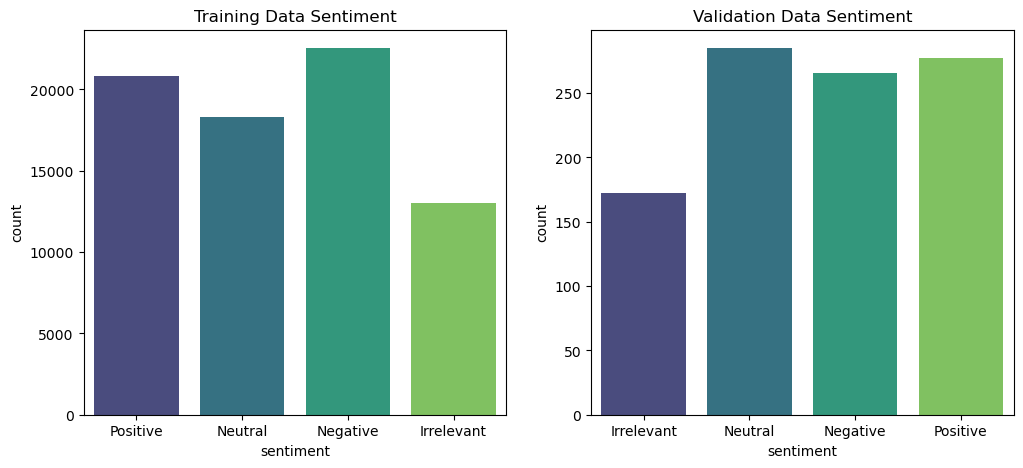

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='sentiment', palette='viridis')
plt.title('Training Data Sentiment')

plt.subplot(1, 2, 2)
sns.countplot(data=valid_df, x='sentiment', palette='viridis')
plt.title('Validation Data Sentiment')
plt.show()

entity
TomClancysRainbowSix         2435
LeagueOfLegends              2431
MaddenNFL                    2429
Microsoft                    2428
CallOfDuty                   2425
Verizon                      2414
ApexLegends                  2412
Facebook                     2403
CallOfDutyBlackopsColdWar    2403
WorldOfCraft                 2394
Name: count, dtype: int64


/var/folders/k_/2_v03dyd4xz6rfmzl8p9c0_r0000gn/T/ipykernel_85747/327895031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')


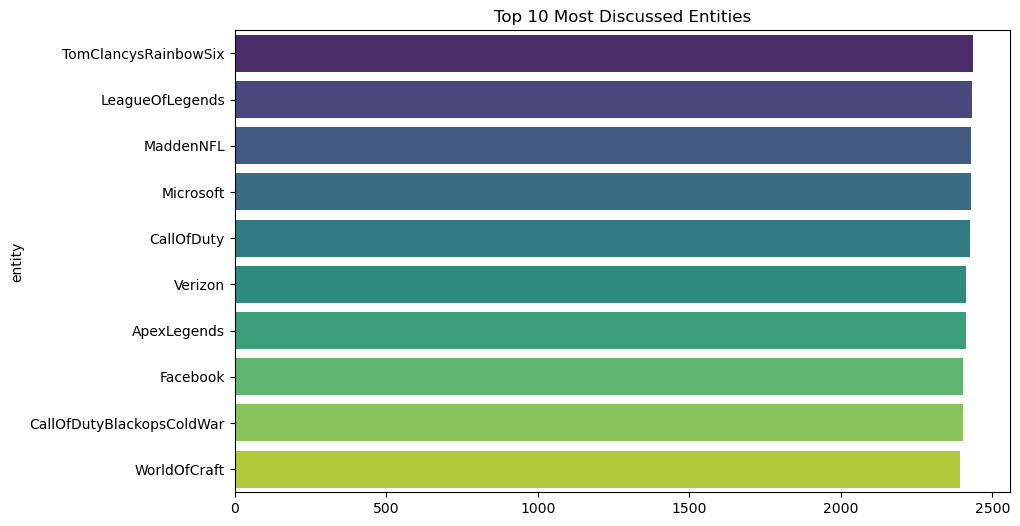

In [6]:
top_entities = combined_df['entity'].value_counts().head(10)
print(top_entities)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')
plt.title('Top 10 Most Discussed Entities')
plt.show()

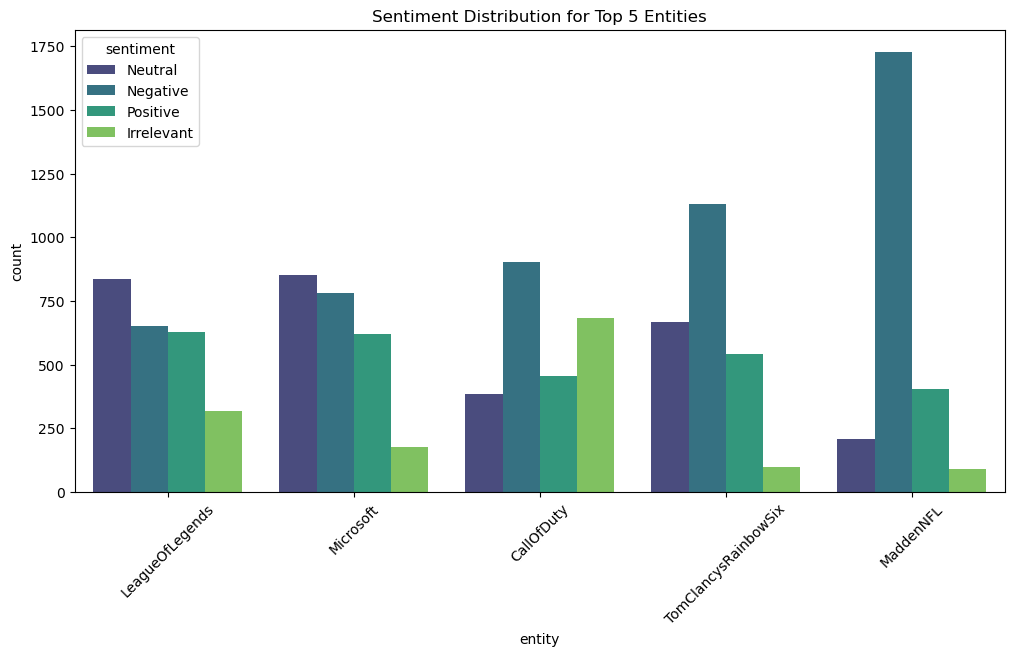

In [8]:
top_5_entities = top_entities.index[:5]
entity_sentiment = combined_df[combined_df['entity'].isin(top_5_entities)]

plt.figure(figsize=(12, 6))
sns.countplot(data=entity_sentiment, x='entity', hue='sentiment', palette='viridis')
plt.title('Sentiment Distribution for Top 5 Entities')
plt.xticks(rotation=45)
plt.show()

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
print(combined_df.columns)

Index(['tweet_id', 'entity', 'sentiment', 'tweet_content', 'cleaned_tweet'], dtype='object')


In [14]:
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)            
    text = text.lower()                                
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return ' '.join(tokens)

combined_df['cleaned_tweet'] = combined_df['tweet_content'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shlndra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shlndra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
combined_df['cleaned_tweet'] = combined_df['tweet_content'].apply(clean_text)  

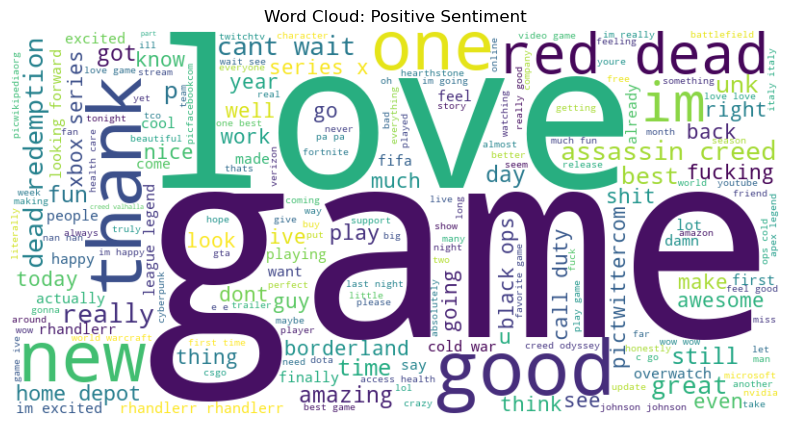

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(sentiment):
    text = ' '.join(combined_df[combined_df['sentiment'] == sentiment]['cleaned_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud: {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

plot_wordcloud('Positive')  

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


train_df = pd.read_csv('twitter_training.csv', header=None, 
                      names=['tweet_id', 'entity', 'sentiment', 'tweet_content'])
valid_df = pd.read_csv('twitter_validation.csv', header=None,
                      names=['tweet_id', 'entity', 'sentiment', 'tweet_content'])


def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)  # Remove URLs/mentions/hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)        # Remove special chars
    text = text.lower()                             # Lowercase
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply cleaning to BOTH DataFrames
train_df['cleaned_tweet'] = train_df['tweet_content'].apply(clean_text)
valid_df['cleaned_tweet'] = valid_df['tweet_content'].apply(clean_text)

# Now run VADER analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 'Positive' if score > 0.05 else 'Negative' if score < -0.05 else 'Neutral'

valid_df['vader_sentiment'] = valid_df['cleaned_tweet'].apply(vader_sentiment)

# Compare results
from sklearn.metrics import classification_report
print(classification_report(valid_df['sentiment'], valid_df['vader_sentiment']))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shlndra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shlndra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shlndra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       172
    Negative       0.42      0.62      0.50       266
     Neutral       0.39      0.16      0.23       285
    Positive       0.41      0.72      0.52       277

    accuracy                           0.41      1000
   macro avg       0.30      0.38      0.31      1000
weighted avg       0.33      0.41      0.34      1000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
